- As expected, urban areas hold the greatest share of fares, rides, and drivers at 62%, 67.5%, and 86%, respectively, compared to rural and suburban areas.

- One city, Port James, outpaces the rest of the cities in number of rides despite having only nine drivers and being a suburban city.

- One rural city, Manuelchester, has the highest average median fare at $49.62. We can assume that Manuelchester's one ride and fare was a longer commute, thus the higher fare.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

In [2]:
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')
print(city_data.head())
print(ride_data.head())

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [3]:
data = pd.merge(ride_data, city_data, on='city')
data = data.dropna()

data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [4]:
pyber = data.pivot_table(index=['type','city'], values=['ride_id','driver_count','fare'], aggfunc={
    'ride_id': len,
    'driver_count': np.mean,
    'fare': np.mean
})
pyber = pyber.rename(columns={
    'ride_id': '# of Rides',
    'driver_count': 'Driver Count',
    'fare': 'Median Fare ($)'
})
pyber.head()

Driver Count  Median Fare ($)  # of Rides
type  city                                                     
Rural East Leslie                9        33.660909          11
      East Stephen               6        39.053000          10
      East Troybury              3        33.244286           7
      Erikport                   3        30.043750           8
      Hernandezshire            10        32.002222           9

In [5]:
urban = pyber.loc['Urban']
urbanDriver = urban['Driver Count']
urbanFare = urban['Median Fare ($)']
urbanRides = urban['# of Rides']

suburban = pyber.loc['Suburban']
suburbanDriver = suburban['Driver Count']
suburbanFare = suburban['Median Fare ($)']
suburbanRides = suburban['# of Rides']

rural = pyber.loc['Rural']
ruralDriver = rural['Driver Count']
ruralFare = rural['Median Fare ($)']
ruralRides = rural['# of Rides']

Text(0.5,1,'Pyber Ride Sharing Data (2016)')

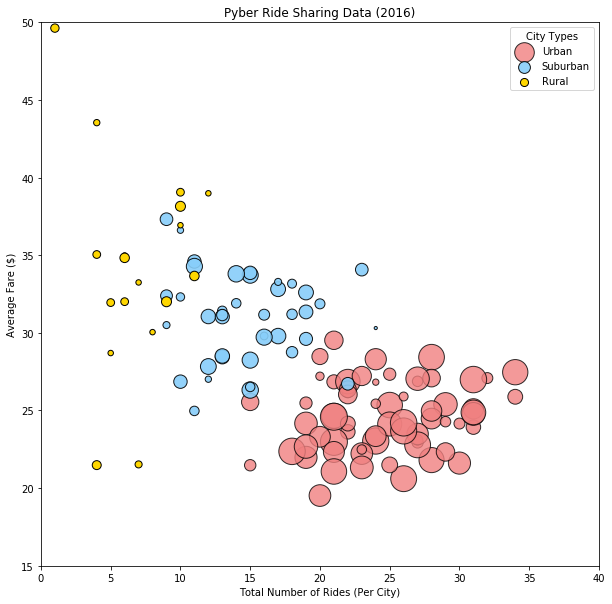

In [6]:
plt.figure(figsize=(10,10))
plt.xlim(0,40)
plt.ylim(15,50)
urban1 = plt.scatter(urbanRides, urbanFare, sizes=10*urbanDriver, c='lightcoral', edgecolors='black', linewidths=1, alpha=.8)
suburban1 = plt.scatter(suburbanRides, suburbanFare, sizes=10*suburbanDriver, c='lightskyblue', edgecolors='black', linewidths=1, alpha=.9)
rural1 = plt.scatter(ruralRides, ruralFare, sizes=10*ruralDriver, c='gold', edgecolors='black', linewidths=1, alpha=1)

plt.legend((urban1,suburban1,rural1), ('Urban','Suburban','Rural'), title='City Types', loc='upper right')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

In [7]:
pieFare_df = data.pivot_table(index='type', values='fare', aggfunc=np.sum)
fare = pieFare_df['fare']
explode = [0,0,0.15]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
# pieFare_df

(-1.121833368095511,
 1.2596436184477497,
 -1.169844945722475,
 1.1033259497963084)

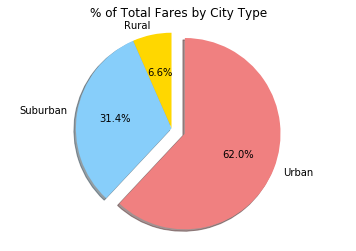

In [8]:
plt.pie(fare, explode=explode, labels=labels, colors=colors, autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title('% of Total Fares by City Type')
plt.axis('equal')

In [9]:
pieRide_df = data.pivot_table(index='type', values='ride_id', aggfunc={'ride_id': len})
pieRide_df = pieRide_df.rename(columns={'ride_id': 'Total Rides'})
rides = pieRide_df['Total Rides']
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
# pieRide_df

(-1.1119343974521638,
 1.2380242821369933,
 -1.1889385487356234,
 1.1042351689874106)

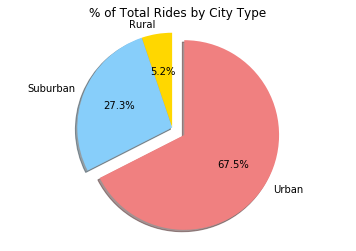

In [10]:
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title('% of Total Rides by City Type')
plt.axis('equal')

In [11]:
pieDrivers = data.groupby('type')
drivers = pieDrivers['driver_count'].sum()
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0,0,0.17]

(-1.030180087376102,
 1.1788886786005603,
 -1.2682239617700268,
 1.1080106648461918)

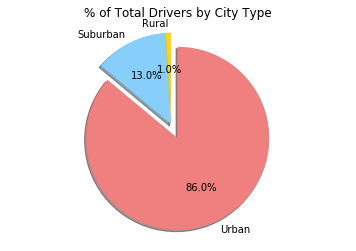

In [12]:
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title('% of Total Drivers by City Type')
plt.axis('equal')